# Introduction - What is the question?

The purpose of this notebook is for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. In other words the question is - Which factors have the biggest impact on obestiy levels of an individual?



## More about the data      

Number of attributes : 17 

Number of rows : 2111

**Independent Variables**

1.   ***Gender*** - (Male/Female) 
2.   ***Age*** - In years
3.   ***Height*** - In meters
4.   ***Weight*** - In Kgs
4.   ***family_history_with_overweight*** - Family history in obesity - Yes or No
5.   ***FAVC*** - Frequent consumption of high caloric food  - Yes/No
6.   ***FCVC*** - Frequency of consumption of vegetables - 1 = never, 2 = sometimes, 3 = always

7.   ***NCP*** - Number of main meals - 1, 2, 3 or 4 meals
8.   ***CAEC*** - Consumption of food between meals - No, Sometimes, Frequently, Always
9.   ***Smoke*** - Does the person smoke - Yes/No
10.  ***CH20*** - Consumption of water daily - 1 = less than a liter, 2 = 1–2 liters, 3 = more than 2 liters
11.  ***SCC*** - Calories consumption monitoring - Yes/No
12.  ***FAF*** - Physical activity frequency - 0 = none, 1 = 1 to 2 days, 2= 2 to 4 days, 3 = 4 to 5 days
13.  ***TUE*** - Time using technology devices - 0 = 0–2 hours, 1 = 3–5 hours, 2 = more than 5 hours
14.  ***CALC*** - Consumption of alcohol - No, Sometimes, Frequently and Always
15.  ***MTRANS*** - Transportation used - Public Transportation, Motorbike, Bike, Automobile and Walking

**Dependent Variables**
1.   ***NObeyesdad*** - Obesity level - Insufficient Weight, Normal Weight, Overweight Level I, Overweight Level II, Obesity Type I, Obesity Type II and Obesity Type III  

## What are the data types?

Gender - Categorical<br>
Age - Numeric<br>
Height - Numeric<br>
Weight - Numeric<br>
family_history_with_overweight - Categorical<br>
FAVC - Categorical<br>
FCVC - Categorical<br>
NCP - Categorical <br>
CAEC - Categorical<br>
SMOKE - Categorical<br>
CH2O - Categorical<br>
SCC - Categorical<br>
FAF - Categorical<br>
TUE - Categorical<br>
CALC - Categorical<br>
MTRANS - Categorical<br>
NObeyesdad - Categorical<br>



# Setting up the data


In [498]:
# Importing the dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
import math
import matplotlib
from matplotlib import pyplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

# interactive plots acheived using plotly
import plotly.express as px
import plotly.graph_objects as go

! pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [499]:
! pip install h2o
import h2o
from h2o.automl import H2OAutoML
from h2o.estimators.glm import H2OGeneralizedLinearEstimator
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o.estimators.random_forest import H2ORandomForestEstimator


h2o.init()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,4 hours 51 mins
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.3
H2O_cluster_version_age:,22 days
H2O_cluster_name:,H2O_from_python_unknownUser_hc3078
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.668 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [500]:
# Author - @Sai Dutt
# Reading the file and storing columns seperately
data = pd.read_csv("https://raw.githubusercontent.com/Apurva-Nehru/Skunks_Skool/4e9f3d8a9b24ae9dcbd7f17b3ce7a16cc0501b54/INFO_6105/ML_Data_Cleaning_and_Feature_Selection/ObesityClassification_ML_Data_Cleaning_and_feature_selection/ObesityDataSet.csv")


In [501]:
# Check the dimensions of the data 
print(data.shape)

# First few rows of the dataset 
data.head()

(2111, 17)


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


## Are there missing values?



In [502]:
#checking if the any data is missing
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

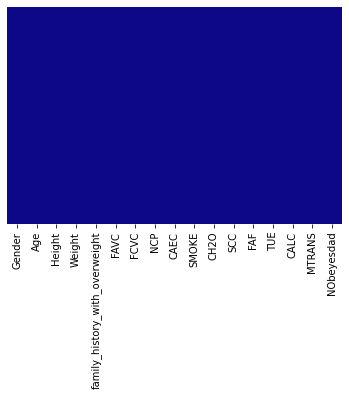

In [503]:
#Check if there are any missing values 
sns.heatmap(data.isnull(), cbar=False, yticklabels=False, cmap='plasma')

We see from the above result that there is no missing data.

Let us check for duplicate data. 

In [504]:
#Check how many duplicate rows there are 
dup_data = data[data.duplicated()]
print(dup_data.shape)

(24, 17)


Oops, we see that there are 24 rows of duplicate data. Lets remove them.

In [505]:
#Drop duplicates 
df = data.drop_duplicates(keep='last')

Before we proceed lets validate the data further. We see that there are no empty cells in our data but let us check the validity of the data. Let us validate the categorical data

In [506]:
# Checking unique values of categorical variables
# Author - Sai Dutt
cat_col = ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']

for cat in cat_col:
  print(cat)
  print(data[cat].unique())
  print("\n")

Gender
['Female' 'Male']


family_history_with_overweight
['yes' 'no']


FAVC
['no' 'yes']


CAEC
['Sometimes' 'Frequently' 'Always' 'no']


SMOKE
['no' 'yes']


SCC
['no' 'yes']


CALC
['no' 'Sometimes' 'Frequently' 'Always']


MTRANS
['Public_Transportation' 'Walking' 'Automobile' 'Motorbike' 'Bike']


NObeyesdad
['Normal_Weight' 'Overweight_Level_I' 'Overweight_Level_II'
 'Obesity_Type_I' 'Insufficient_Weight' 'Obesity_Type_II'
 'Obesity_Type_III']




Let us check the validity of the data

In [507]:
data.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


## Data transformation

In [508]:
# Author - Sai Dutt
# Storing colum names in a list for later use
cols = []
for col in data.head(1) :  
  cols.append(col)

Let us take a closer look at the independent variable

In [509]:
data['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

Thats a lot of categories. Let us encode them with numbers. Since, there is a natural heirarchy among the classes this makes sense. 

In [510]:
data['NObeyesdad'] = data['NObeyesdad'].map({'Normal_Weight' : "Not Obese", 'Overweight_Level_I': "Not Obese", 'Overweight_Level_II': "Not Obese", 'Insufficient_Weight': "Not Obese", \
 'Obesity_Type_I' : "Obese"  , 'Obesity_Type_II' : "Obese", \
 'Obesity_Type_III' : "Obese" })


We convert the categorical features into numerical data. Categories such as CAEC, CALC, family_history and MTRANS  follow a set order so this makes sense. The rest are have two classes.  


In [511]:
# Encoding the categories with numeric values
# Author - Sai Dutt

data['CAEC'] = data['CAEC'].apply(lambda x: ['no', 'Sometimes', 'Frequently', 'Always'].index(x))
data['SMOKE'] = data['SMOKE'].apply(lambda x: ['yes', 'no'].index(x))
data['SCC'] = data['SCC'].apply(lambda x: ['yes', 'no'].index(x))
data['CALC'] = data['CALC'].apply(lambda x:['no', 'Sometimes', 'Frequently', 'Always'].index(x))
data['Gender'] = data['Gender'].map({'Male' : 0, 'Female': 1})
data['family_history_with_overweight'] = data['family_history_with_overweight'].map({'no' : 0, 'yes': 1})
data['FAVC'] = data['FAVC'].map({'no' : 0, 'yes': 1})
data['MTRANS'] = data['MTRANS'].map({'Public_Transportation': 1, 'Walking':2, 'Automobile':3, 'Motorbike':4, 'Bike':5})
data.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.0,1.62,64.0,1,0,2.0,3.0,1,1,2.0,1,0.0,1.0,0,1,Not Obese
1,1,21.0,1.52,56.0,1,0,3.0,3.0,1,0,3.0,0,3.0,0.0,1,1,Not Obese
2,0,23.0,1.80,77.0,1,0,2.0,3.0,1,1,2.0,1,2.0,1.0,2,1,Not Obese
3,0,27.0,1.80,87.0,0,0,3.0,3.0,1,1,2.0,1,2.0,0.0,2,2,Not Obese
4,0,22.0,1.78,89.8,0,0,2.0,1.0,1,1,2.0,1,0.0,0.0,1,1,Not Obese


Let us split the data into training and test sets (70 and 30 respectively) 

In [512]:
#Store the feature and target variable 
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

X_rf = data_rf.iloc[:, :-1]
y_rf = data_rf.iloc[:, -1]

print(data.shape)
print(X.shape)
print(y.shape)

#Partition the data into training and test sets (70/30)
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=42)

# for random forest
X_train_rf, X_test_rf, y_train_rf, y_test_rf = train_test_split(X_rf,y_rf,test_size=0.30,random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2111, 17)
(2111, 16)
(2111,)
(1477, 16)
(634, 16)
(1477,)
(634,)


In [513]:
# Converting data frame to h20 frame
h2o_frame = h2o.H2OFrame(data)

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


## What are the likely distributions of the numeric variables?

Most of our data is categorical with the exception of age, height and weight. We can look at their distribution in our dataset. 

<Figure size 576x360 with 0 Axes>

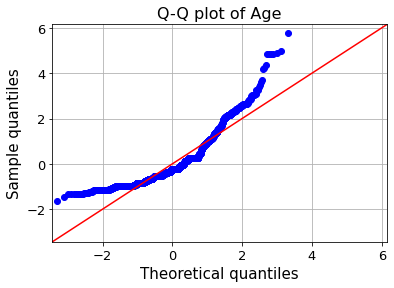

<Figure size 576x360 with 0 Axes>

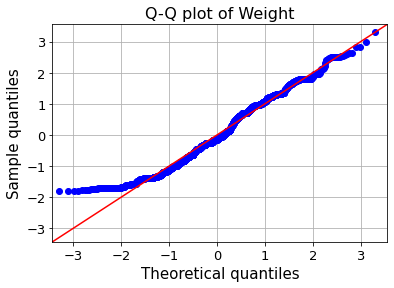

<Figure size 576x360 with 0 Axes>

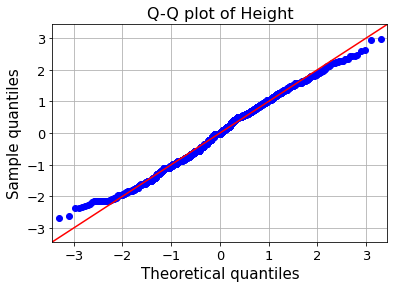

In [514]:
#checking the distribution of independent variables
from statsmodels.graphics.gofplots import qqplot
data_norm=data[['Age', 'Weight', 'Height']]

for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()


In [515]:
fig = px.histogram(df, x="Age")
fig.show()


As we can see from the above graphs, Height seems to follow the normal distribution and Weight is bimodal but Height seems to be skewed positively i.e the tail is on the right side. 

## Do the training and test set have same data? 

In [516]:
X_test_plot = X_test[cols[:-1]]
X_train_plot = X_train[cols[:-1]]


# Plotting the data to see the histogram
for col in X_test_plot.columns[:]:
  # creating the histogram plotly object
  fig = go.Figure()
  fig.update_layout(
    title_text= col + ' distribution', # title of plot
    xaxis_title_text='Value', # xaxis label
    yaxis_title_text='Count', # yaxis label    
  )

  fig.add_trace(go.Histogram(x=X_test_plot[col], name='Test'))
  fig.add_trace(go.Histogram(x=X_train_plot[col], name='Train'))
  
  # Overlay both histograms
  fig.update_layout(barmode='overlay')
  # Reduce opacity to see both histograms
  fig.update_traces(opacity=0.75)
  fig.show()

 


Apart from a few boundary values the data split between training set and test set is fine

## Are the predictor variables independent of all the other predictor variables?


In [517]:
# plotting the correlation matrix
fig = px.imshow(data.corr(), text_auto=True, aspect="auto")
fig.show()

From the correlation matrix we see strong corellations between Gender-Height

## Checking for outliers

Let us look at the box-plot of the numerical variables for a better understanding. 

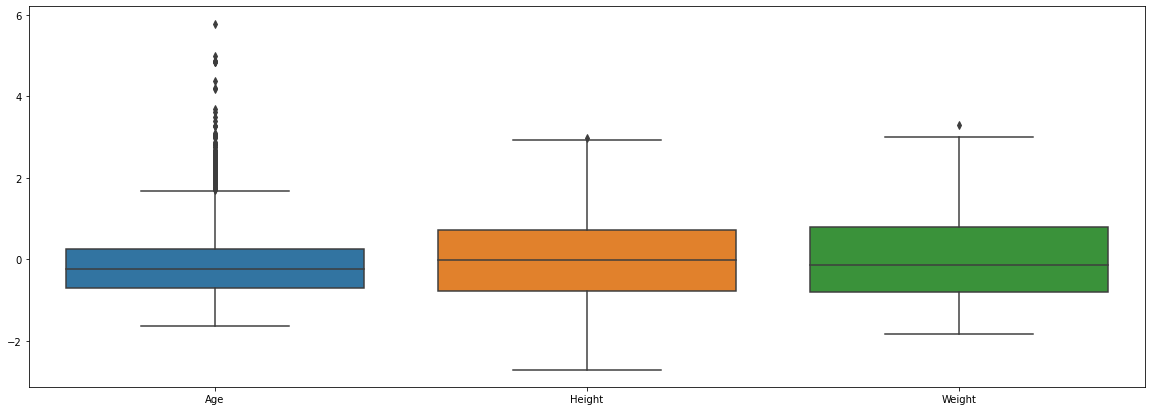

In [518]:
# the scaler object (model)
scaler = StandardScaler()

# fit and transform the data
scaled_data = data.iloc[:, 1:4]

# Z-Score using pandas
scaled_data['Age'] = ( scaled_data['Age'] -  scaled_data['Age'].mean()) / scaled_data['Age'].std()
scaled_data['Height'] = ( scaled_data['Height'] -  scaled_data['Height'].mean()) / scaled_data['Height'].std()
scaled_data['Weight'] = ( scaled_data['Weight'] -  scaled_data['Weight'].mean()) / scaled_data['Weight'].std()

#Checking the Ranges of the predictor variables and dependent variable after standardizing
plt.figure(figsize=(20,7))
sns.boxplot(data=scaled_data)

When it comes to age there are a lot of outliers, mostly older people. Hence removing the outliers will affect the final predictive model.

# What did i do?

Let us train a logistic regression and Random forest model



## Logistic regression

We will be running logit with lasso regularization as it does not require standardization


1930        Obese
1803        Obese
1198    Not Obese
15      Not Obese
816     Not Obese
Name: NObeyesdad, dtype: object


The max_iter was reached which means the coef_ did not converge


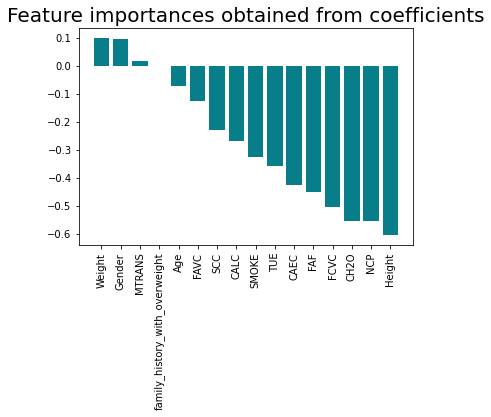

In [519]:
print(y_train.head())

# Training a logit model with lasso reg
logit_model = LogisticRegression(penalty="l1", solver="saga")
logit_model.fit(X_train, y_train)

importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': logit_model.coef_[0]
})

# plotting feat imp
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

## Random forest

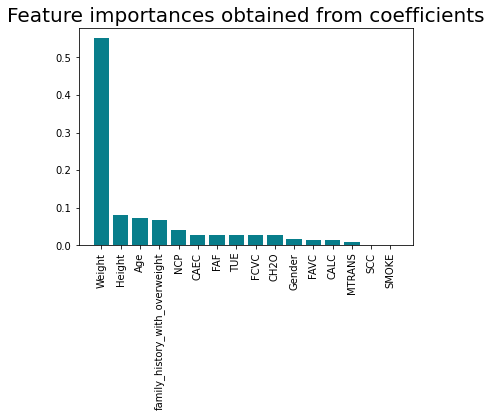

In [521]:
# Training a rf classifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Importance rankings
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': rf_model.feature_importances_
})

# plotting feat imp
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients', size=20)
plt.xticks(rotation='vertical')
plt.show()

## Running H2O

Now we will train the data using H2O to find the best model using leaderboard. 

In [522]:
# split into training and test for cross validation
train, test = h2o_frame.split_frame([0.7], seed = 1)

# assign target and inputs for logistic regression
y = 'NObeyesdad'
X = [name for name in h2o_frame.columns if name != y]

train.head()

Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
1,21,1.62,64,1,0,2,3,1,1,2,1,0,1,0,1,Not Obese
1,21,1.52,56,1,0,3,3,1,0,3,0,3,0,1,1,Not Obese
0,27,1.8,87,0,0,3,3,1,1,2,1,2,0,2,2,Not Obese
0,29,1.62,53,0,1,2,3,1,1,2,1,0,0,1,3,Not Obese
0,22,1.64,53,0,0,2,3,1,1,2,1,3,0,1,1,Not Obese
0,24,1.78,64,1,1,3,3,1,1,2,1,1,1,2,1,Not Obese
1,21,1.72,80,1,1,2,3,2,1,2,0,2,1,1,1,Not Obese
0,41,1.8,99,0,1,2,3,1,1,2,1,2,1,2,3,Obese
0,23,1.77,60,1,1,3,1,1,1,1,1,1,1,1,1,Not Obese
1,22,1.7,66,1,0,3,3,3,1,2,0,2,1,1,1,Not Obese


In [523]:
run_time=333

# Running linear regression
automl_models = H2OAutoML(max_runtime_secs=run_time, exclude_algos = ["StackedEnsemble", "DeepLearning"])

automl_models.train(x                = X,
                    y                = y,
                    training_frame   = train,
                    validation_frame = test)

AutoML progress: |
04:47:09.741: User specified a validation frame with cross-validation still enabled. Please note that the models will still be validated using cross-validation only, the validation frame will be used to provide purely informative validation metrics on the trained models.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_grid_1_AutoML_14_20221216_44709_model_2


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    169                169                         150362                 7            9            8.98817       24            106           65.9822

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 4.74828636583284e-10
RMSE: 2.1790563016665817e-05
LogLoss: 7.0832067749618114e-06
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0
Gini: 1.0

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.9996333206222892
           Not Obese    Obese    Error    Rate
---------  -----------  -------  -------  ------------
Not Obese  801          0        0        (0.0/801.0)
Obese      0            694      0        (0.0/694.0)
Total      801          694      0        (0.0/1495.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.999633     1         184
max f2                       0.999633     1         184
max f0point5                 0.999633     1         184
max accuracy                 0.999633     1         184
max precision                1            1         0
max recall                   0.999633     1         184
max specificity              1            1         0
max absolute_mcc             0.999633     1         184
max min_per_class_accuracy   0.999633     1         184
max mean_per_class_accuracy  0.999633     1         184
max tns                      1            801       0
max fns                      1            691       0
max fps                      8.78452e-08  801       399
max tps                      0.999633     694       184
max tnr                      1            1         0
max fnr                      1            0.995677  0
max fpr                      8.78452e-08  1         399
max tpr                      0.999633     1         184

Gains/Lift Table: Avg response rate: 46.42 %, avg score: 46.42 %
group    cumulative_data_fraction    lower_threshold    lift     cumulative_lift    response_rate    score        cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain     cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  -------  -----------------  ---------------  -----------  --------------------------  ------------------  --------------  -------------------------  -------  -----------------  --------------------
1        0.0100334                   1                  2.15418  2.15418            1                1            1                           1                   0.0216138       0.0216138                  115.418  115.418            0.0216138
2        0.0200669                   1                  2.15418  2.15418            1                1            1                           1                   0.0216138       0.0432277                  115.418  115.418            0.0432277
3        0.0301003                   0.999999           2.15418  2.15418            1                1            1                           1                   0.0216138       0.0648415                  115.418  115.418            0.0648415
4        0.0401338                   0.999999           2.15418  2.15418            1                0.999999     1                           1                   0.0216138       0.0864553                  115.418  115.418            0.0864553
5        0.0501672                   0.999999           2.15418  2.15418            1                0.999999     1         

In [524]:
automl_models.leaderboard

best_model = h2o.get_model(automl_models.leaderboard[0,'model_id'])
print(best_model.model_id)

GBM_grid_1_AutoML_14_20221216_44709_model_2


# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

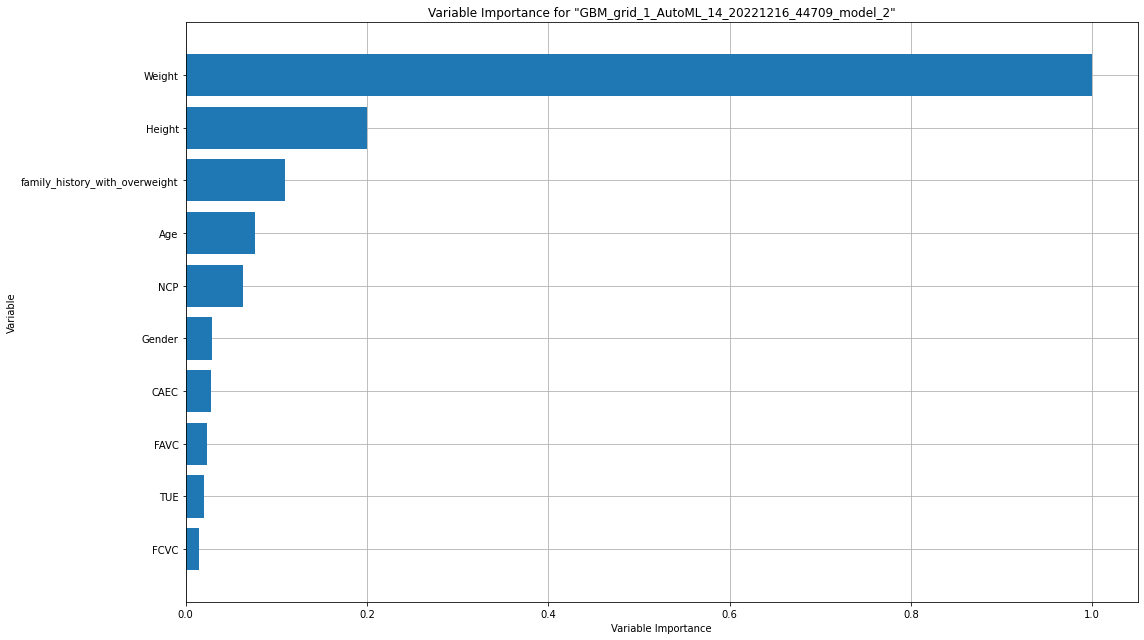

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

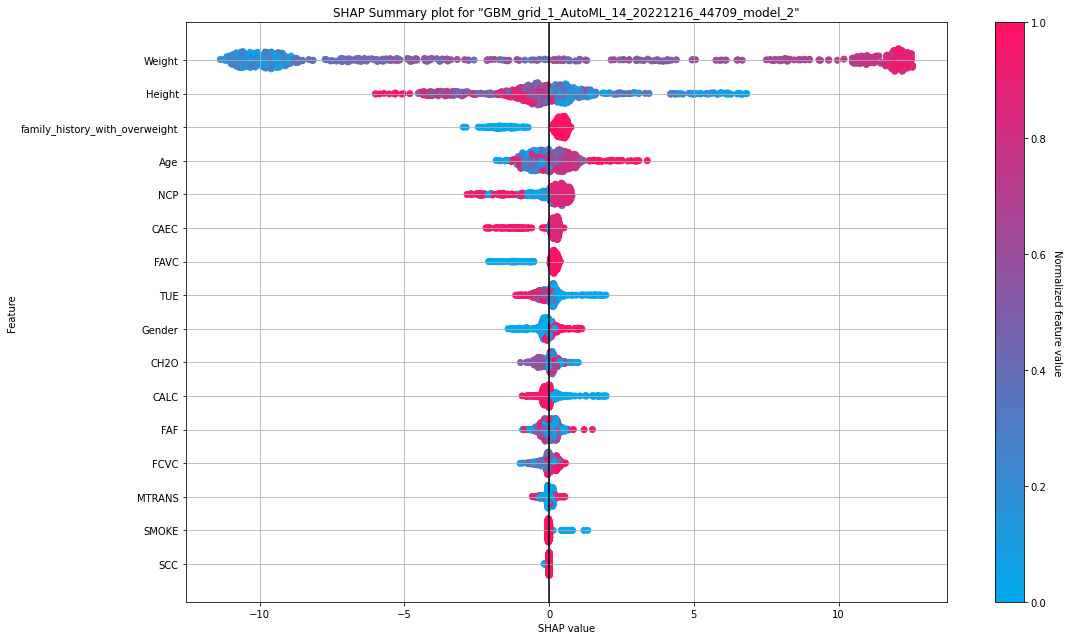

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

In [525]:
best_model.explain(test, include_explanations=["varimp", "shap_summary"])

# How well did it work?

Since this is a **binary-classification** problem we are interested at the recall and precision of the model to determine the accuracy. 

We want an accurate prediction of the obesity score we ideally want both false negatives and false positives to be low. 


That being said we would prefer the False positive rates be higher than the False negative rate as classifying a person as obese when they are not obese is **much less damaging** than misclassifying an obese person as not obese

Hence, we can look at the AUC to determine the accuracy score. 

## Logistic regression

In [526]:
#use model to predict probability that given y value is 1
y_pred_proba = logit_model.predict_proba(X_test)[::,1]

#calculate AUC of model
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#print AUC score
print(auc)


0.9649064707771355


## Random forest 

In [527]:
metrics.roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1])

0.9998444524727039

## AutoML best model (GBM)


In [528]:
best_model.auc()

1.0

## Conclusion

From the above AUC scores we see that the AUTO ML model(GBM) performs the best with an AUC score of 1.0 followed by the Random forest and finally the logistic regression model

# What did I learn? 


We learn thanks to auto ml that the best model to classify the obesity levels is the Gradient boosting model. Moreover, from the shapley values and varimp graphs we see that the most important features contributing to Obesity score is Weight, Height, Family history and Age

# References


1. https://plotly.com/python/histograms/
2. Obesity levels notebook
3. https://plotly.com/python/heatmaps/
4. https://towardsdatascience.com/how-and-why-to-standardize-your-data-996926c2c832
5. https://stackoverflow.com/questions/46971969/conversion-of-pandas-dataframe-to-h2o-frame-efficiently
6. https://towardsdatascience.com/evaluating-performance-of-models-8d5c3ca6f8cf
7. https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a

# License

Copyright 2022 Sai Dutt

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.